In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [8]:
# Predefined list of stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', 
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "et", "al"
])

In [9]:
# Import Data
data = pd.read_excel('scraped_text_v1.xlsx')
data.head()

,Title,Author,Keywords,Filename,Text
0,ChatGPT – A Systematic Review of Published Res...,"Alin ZAMFIROIU, Denisa VASILE, Daniel SAVU","ChatGPT, OpenAI, Papers, Research, Review",01 Zamfiroiu Vasile Savu.pdf,"Informatica Economică vol. 27, no. 1/2023 \n \..."
1,ChatGPT in nursing education: opportunities an...,"Ponrathi Athilingam, Hong-Gu He","Artificial intelligence, Challenges, ChatGPT, ...",1-s2.0-S0169260724000087-main.pdf,Computer Methods and Programs in Biomedicine 2...
2,Teaching and Learning in Nursing,"Ponrathi Athilingam, Hong-Gu He","Artificial intelligence, Challenges, ChatGPT, ...",1-s2.0-S1557308723002287-main.pdf,Full Length Article\nChatGPT in nursing educat...
3,GPTs are GPTs: An Early Look at the Labor Mark...,"Tyna Eloundou, Sam Manning, Pamela Mishkin, Da...","GPT, Labor Market, Large Language Models, Auto...",2303.10130.pdf,WORKING PAPER\nGPTs are GPTs: An Early Look at...
4,An Overview of the Evolution and Impact of Cha...,"Ankar Tersoo Catherine, S. K. Towfek, Abdelazi...","Artificial intelligence, Healthcare, Chatbots,...",14.pdf,\n \n \n*Corresponding author. Email: ankartr...


In [10]:
# Function to clean and preprocess text
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the text column
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

# Create a CountVectorizer for converting text data into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['Cleaned_Text'])

# Define the number of topics
num_topics = 5

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [11]:
!pip install wordcloud

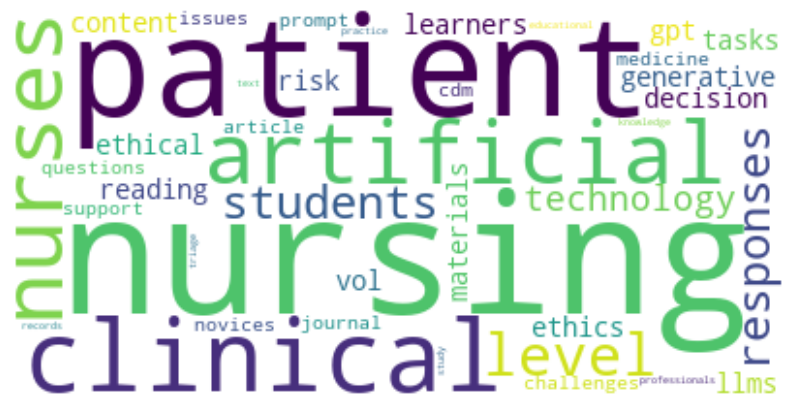

In [12]:
# Get the feature names (i.e., words)
feature_names = vectorizer.get_feature_names_out()

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

# Display the top words for each topic
no_top_words = 10
topics = display_topics(lda, feature_names, no_top_words)

# Convert topics to DataFrame for display
topics_df = pd.DataFrame(topics)

import matplotlib
# matplotlib.use('agg')

# Display the topics in a Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert topics to a single string
topics_string = ' '.join([' '.join(words) for words in topics_df.values])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(topics_string)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the figure to a file instead of displaying it
plt.savefig('wordcloud.png')